In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

num_points = 20
radius = 8.00

In [2]:
import os
# Play a notification sound
notification_sound = "program_completed.wav"  # Replace with the actual audio file name
# os.system(f"afplay {notification_sound}")

In [3]:
# generating random x and y coordinates of the tags with values between-15 to 15
# x_coords = np.random.uniform(-15, 15, 20)
# y_coords = np.random.uniform(-15, 15, 20)

#0
x_coords = [ -5.32463153,  -8.76051415,  -1.15636462,   2.19195406,   3.21037006,
  14.11990191, -14.26377168, -12.93228116,   2.58042298,   5.93712745,
   8.08366368,   9.57134564,  -2.85396558, -13.11097522,  -7.59629256,
  -4.24879346,  -3.31284688,  -9.70391303,   6.36873875,  10.41085005]
y_coords = [-14.2935121,    5.67973811,   4.08538733,  -3.04254408,   4.14224576,
   8.74004094, -10.90073777,  -2.88978037,  -9.26896965, -14.57394033,
  -4.0107698,   13.50963778,  -2.72081589,   4.94863212,   3.07360091,
 -12.12926027,   8.99771014, -13.81522331,   4.15886645,   9.65946393]
point_labels = [f"P{i + 1}" for i in range(num_points)]

In [4]:
def saveplot(name):
    
    
    subdirectory = "experiments"
    path = os.path.join(os.getcwd(), subdirectory)
    filepath = os.path.join(path, name)
    
    
    
    # for Figure plotting
    fig, ax = plt.subplots()
    # Set the x and y limits of the axes
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])

    # Plot the points on the axis
    # ax.scatter(x_coords, y_coords)
    for i in range(num_points):
        ax.scatter(x_coords[i], y_coords[i])
        ax.annotate(point_labels[i], (x_coords[i], y_coords[i]))

    # Add gridlines
    ax.grid(True)

    # Set the title and axis labels
    ax.set_title(f"Random Points on Cartesian Plane ({num_points} points)")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    
    
    
    plt.savefig(filepath)

In [5]:
import pandas as pd
import numpy as np
def savedata(data, name):
    
    subdirectory = "experiments"
    path = os.path.join(os.getcwd(), subdirectory)
    filepath = os.path.join(path, name)
    
    df = pd.DataFrame(data)
    df.columns = df.columns + 1

    # Save the DataFrame to an Excel file
    df.to_excel(filepath, index=False)
    

In [6]:
import random

# function to select nodes requesting to transmit their messages.
def select_nodes():
    nodes = [random.uniform(0,1) for _ in range(num_points + 1)]  
    nodes = [0 if v < 0.0 else 1 for v in nodes]
    nodes[0] = 0  #X[0] is default 0 to make 1-based indexing
    return nodes

In [7]:
import numpy as np

# function to select destination nodes, for the nodes which want to transmit
def select_destinations(X_vec):
    
    dest = [0 for i in range (num_points + 1)]
    selected_nodes = [i for i, x in enumerate(X_vec) if x == 1]
    
    for node in selected_nodes:
        neighbors = np.array(neighbor_table.loc[f"P{node}"])
        neighbor_indices = np.where(neighbors == 1)[0]
        if len(neighbor_indices) > 0:
            random_neighbor = np.random.choice(neighbor_indices) + 1
            dest[node] = random_neighbor
        else:
            pass
        
    return dest

In [8]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

def get_dist_matrix(x_coords_loc, y_coords_loc):
    
    points = [(x_coords_loc[i], y_coords_loc[i]) for i in range(num_points)]
    distances = pdist(points)
    dist_mat = squareform(distances)
    dist_mat = pd.DataFrame(dist_mat, columns = point_labels, index = point_labels)
    
    return dist_mat

In [9]:
def get_neighbor_table(dist_mat):
    neighbor_tbl = dist_mat
    neighbor_tbl = neighbor_tbl.applymap(lambda x : 1000000 if x > radius else 1)

    for i in range(num_points):
        neighbor_tbl.at[f"P{i + 1}", f"P{i + 1}"] = 0
    
    return neighbor_tbl

In [10]:
def define_c3(dst, neighbor):
    constraint = []
    
    for i in range(len(dst)):
        str = []
        
        if(dst[i] > 0): 
            ind = dst[i]
            
            str.append(ind)   #destination can't transmit also
            
            for j in range(num_points):
                if(neighbor[f"P{ind}"][f"P{j + 1}"] == 1 and j != i - 1):
                    str.append(j + 1)
                    
            constraint.append(str)
            
        else:
            constraint.append('')
        
    return  constraint

In [11]:
import sys
import itertools

def solve_instance(d, c):          #updated the parameters
    
    indexes = [i for i, num in enumerate(d) if num > 0]
    combinations = []
    result = None
    unique_combinations = []
    
      
    for size in range(len(indexes), 0, -1):
        #genetating all combination such that any 1 node finally transmits , or 2 nodes and so on.
        #and these combinations will be checked if they satisfy the constraints
        combinations = itertools.combinations(indexes, size)
        
               
        for combination in combinations:
            valid_comb = True
            for elem in combination:          # EACH element of combination should satisfy the consrtaints
                intersection = set(c[elem]).intersection(set(combination))
                if(len(intersection) > 0):
                    valid_comb = False
                    break
                              
            
            if(valid_comb):                            #for stopping the loop when valid combination found
                result = combination
                break  
            
                       
        if(result != None and len(result) > 0):    #for stopping the loop when valid combination found
            break
                        
                  
    return list(result)


In [12]:
import numpy as np
def generate_data(rows):
    
    #data = pd.DataFrame(columns=['Instance', 'Solution'], index=[i for i in range(rows)])
    
    data_X = []
    data_y = []
#     df.loc[0, 'X'] = X
#     df.loc[0, 'Y'] = Y
    
    for i in range(rows):
        X = select_nodes()
        
        #print(i, end= " ")
        
        D = select_destinations(X)
        #D = [0, 5, 0, 11, 16, 1, 2, 3, 13, 13, 14, 0, 15, 9, 0, 16, 14, 6, 4, 2, 11]
        
        C3 = define_c3(D, neighbor_table)
        #print(f"C3  {C3}")
        
        sol = solve_instance(D,C3)
        #print(f" sol is {sol}")
        
        data_X.append(D[1:])
        #data.at[i, 'Instance'] = D[1:]
        
        
        y_var = [0 for i in range (num_points)]
        
        for j in sol:
            y_var[j - 1] = 1
            
        data_y.append(y_var)
        
        #data.at[i, 'Solution'] = sol
               
    
    x_var = np.array(data_X)
    y_var = np.array(data_y)
    
    return x_var, y_var


In [13]:
def accuracy_function(pred_solution, test_solution):
    # Compare each pair of rows
    elementwise_comparison = (pred_solution == test_solution)

    # Count the number of equal elements in each pair
    equal_counts = np.sum(elementwise_comparison, axis=1)

#     print("Number of equal elements in each pair of rows:")
#     print(equal_counts)

    average = np.sum(equal_counts, axis = 0) / (pred_solution.shape[0] * pred_solution.shape[1])
    
    return average
  

In [14]:
def accuracy_function2(pred_solution, test_solution):
    # Compare each pair of rows
    elementwise_comparison = (pred_solution == test_solution)
    
    # Check if all elements in each row are True (i.e., rows are the same)
    rowwise_comparison = np.all(elementwise_comparison, axis=1)


    num_same_rows = np.sum(rowwise_comparison)

    average = num_same_rows / (pred_solution.shape[0])
    
    return average

In [15]:
# Function to generate a new position 4 units away in a random direction
def new_position(x, y):
    dx = random.uniform(-1, 1)  # Random value between -1 and 1
    dy = random.uniform(-1, 1)  # Random value between -1 and 1
    norm = (dx**2 + dy**2)**0.5
    scale = 6 / norm
    new_x = x + scale * dx
    new_y = y + scale * dy
    return new_x, new_y
    
def move_nodes(num_points_to_move): 
#   Randomly select  points to move
    #num_points_to_move = 5
    selected_indices = random.sample(range(len(x_coords)), num_points_to_move)
    print([(item + 1) for item in selected_indices])

    # Update the selected points with new positions
    for index in selected_indices:
        x_new, y_new = new_position(x_coords[index], y_coords[index])
        if(abs(x_new) > 15):
            x_coords[index] = x_coords[index] - (x_new - x_coords[index])
        else:
            x_coords[index] = x_new

        if(abs(y_new) > 15):
            y_coords[index] = y_coords[index] - (y_new - y_coords[index])
        else:
            y_coords[index] = y_new


In [16]:
pd.set_option('display.max_colwidth', None)
np.set_printoptions(threshold=np.inf)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

def generate_configurations(num_iterations, num_samples):
    
    prefix_x = "X"
    prefix_y = "y"
    
    for iteration in range(1, num_iterations + 1):
        
        move_nodes(20)
        print(x_coords)
        print(y_coords)
        global dist_matrix
        global neighbor_table
        dist_matrix = get_dist_matrix(x_coords, y_coords)
        neighbor_table = get_neighbor_table(dist_matrix)
        
        global_X = prefix_x + str(iteration)
        global_y = prefix_y + str(iteration)
      
        saveplot(f"Conf{iteration}.jpg")
        
        globals()[global_X], globals()[global_y] = generate_data(num_samples)
        
        savedata(globals()[global_X], f"Instance{iteration}.xlsx")
        savedata(globals()[global_y], f"Solution{iteration}.xlsx")
        
        print(f"Created  configuration {iteration}")
    


In [18]:
# building the classifier.

from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

def generate_predictions(num_iterations):
    
    prefix_x = "X"
    prefix_y = "y"
    global_test = prefix_x + "test"
    X_test_1 = globals()[global_test]
  
    
    
    for iteration in range(0, num_iterations + 1):
        global_X = prefix_x + str(iteration)
        global_y = prefix_y + str(iteration)
        
        X_set_1  = globals()[global_X]
        y_set_1  = globals()[global_y]
        # Define the classifier
        clf = MultiOutputClassifier(DecisionTreeClassifier(random_state=42, max_depth = 16, min_samples_leaf=4,
                                                   min_samples_split = 16))

        # Train the classifier
        clf.fit(X_set_1, y_set_1)
        
        score = clf.score(X_set_1, y_set_1)
        print('Train Accuracy:', score)
        
        score = clf.score(X_test_1, ytest)
        print('Test Accuracy:', score)
        
        prediction = f"Sol{iteration}"
        globals()[prediction] = clf.predict(X_test_1)
        
        savedata(globals()[prediction], f"Prediction{iteration}.xlsx")
        print(f"prediction generated {iteration}")
        
        
        
  

In [19]:
def apply_algo(num_iterations):
    
    prefix0 = "Sol0"
    sol_0 = globals()[prefix0]
    
    prefix_a = "sol_alpha"
    
    for iteration in range(1, 10):
        sol_alpha_final =  prefix_a + str(iteration)
        sol_alpha = sol_0
        for i in range(1, num_iterations + 1):
            sol_current = f"Sol{i}"
            selected_array = globals()[sol_current]
            sol_alpha = (iteration * 0.1) * sol_alpha + (1 - (iteration * 0.1)) * selected_array
        print(f"alpha multiplication vector generated {sol_alpha_final}")   
        
        globals()[sol_alpha_final] = sol_alpha
   

0

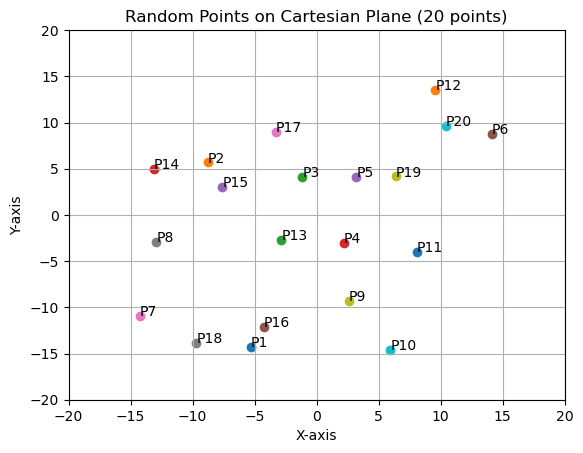

In [20]:
dist_matrix = get_dist_matrix(x_coords, y_coords)
neighbor_table = get_neighbor_table(dist_matrix)

saveplot(f"Conf0.jpg")
X0,y0 = generate_data(100)
savedata(X0, f"Instance0.xlsx")
savedata(y0, f"Solution0.xlsx")

os.system(f"afplay {notification_sound}")

[2, 5, 7, 12, 11, 13, 10, 8, 6, 9, 17, 16, 3, 20, 19, 18, 1, 4, 14, 15]
[-8.698294207046384, -8.203673106557215, -5.6061383559345765, -1.2716836667738942, -2.382670515701573, 10.768665682790619, -14.603477996979656, -7.917079500153414, -3.1956767232901395, 0.3460449956984508, 12.39814987791578, 3.951235026233327, -4.255779640802058, -10.48119608274451, -2.288873232607034, 1.6616670624275116, -9.222179103782201, -13.808408641939424, 10.806741965795101, 5.459429125593717]
[-9.331818826378159, 11.653842900873487, 0.0605253821828029, -7.941851551231885, 6.314317839502847, 3.7631728736916896, -4.910362187600836, 0.40381224461888277, -10.892752953785198, -12.39683284776552, -8.180327192337256, 11.408600729154116, 3.113129373622006, 10.341614753873, 0.27515489779686986, -11.096566504730788, 10.036840867564779, -9.438796026065075, 0.12102947253392937, 6.270742809967898]
Created  configuration 1
[14, 5, 11, 20, 8, 1, 7, 9, 6, 2, 12, 10, 15, 13, 3, 4, 16, 18, 19, 17]
[-12.90933128116442, -10.962

Created  configuration 10
[3, 12, 9, 14, 2, 4, 17, 19, 20, 10, 16, 15, 18, 1, 13, 11, 6, 8, 5, 7]
[6.660895886499337, -2.293008738104887, 6.569419904790042, -2.878760917910218, -7.230540221754388, 9.02080979898312, -6.326938728222167, -5.2900667593594255, -2.449812527910919, -4.780914379667286, -6.342866479131491, -6.6853088002367995, 0.9339772105549979, -2.430698361220364, 0.24276312327163652, -4.440661334395323, -4.313721973606687, -7.231337509168054, -3.440827131222317, 7.195873845192132]
[-6.000091812908114, 4.7289955239299815, -8.46217286578881, 0.46665877286386426, 9.28472542389201, 8.970595613698041, 4.938263271972238, 8.928457811924185, -3.380473350919048, -7.627873124645124, 2.231176476642802, -9.233611469392908, 9.376338100201616, 9.31245042970691, 13.688082266873657, -12.528766840115669, -11.447481852633985, 4.365895416653472, 11.309612654990662, -9.537446760783675]
Created  configuration 11
[11, 2, 9, 12, 20, 8, 3, 10, 5, 7, 14, 18, 17, 15, 19, 1, 4, 13, 16, 6]
[3.135748643

Created  configuration 20
[16, 8, 2, 4, 12, 13, 15, 14, 6, 19, 20, 11, 18, 7, 5, 9, 3, 17, 1, 10]
[-1.0867737187698063, -0.46272253114114914, 6.959753617412799, -9.77771737593418, -3.267605686725738, -5.858584705343567, -7.385559170601498, -3.6731768936487725, 1.9984996419554717, -0.3525231973841665, -5.168466520802588, -1.3650387227753473, 4.449841600650345, 3.2237156633512427, -8.8340114091018, 6.244296984077453, 2.8086474745189256, 2.742032577429613, -10.444027853468418, 7.188493580509084]
[8.39792732377611, 8.717455140443755, 11.653616202592808, 1.7325810569108508, -6.315440612629631, -5.8870931000770295, 14.811126257978295, 8.148973553401085, -6.727521604974493, -14.71794004465012, 13.199889380729953, -3.7791353716332123, -8.356201781075594, 10.038803001167263, -7.219001116049981, 2.5826886414213397, -10.734093774522378, 12.409078736428697, -1.8047184521010826, 5.481877173643707]


/var/folders/0r/7rbxsj2j3xn_ygx_6q1w9b5r0000gn/T/ipykernel_41531/3790251772.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Created  configuration 21
[5, 7, 2, 16, 13, 4, 8, 15, 3, 12, 19, 17, 1, 11, 14, 18, 10, 6, 9, 20]
[-4.605820267691552, 2.4965184781689955, 12.48031032990852, -11.733821107738446, -7.1896171942562415, -11.849000394733238, -2.76240151903197, -7.118837021052335, 7.201465304667643, -3.6827094599005896, -10.753235171176591, -2.509752866893515, 7.419423658699547, 6.408161281556179, -9.328003234306001, 9.448078041384218, 8.554989990593086, 1.0210668979221298, -4.7139437456487805, 3.53947113777351]
[13.257588977278537, 3.497982691161446, 14.003819084073134, -3.939601784854868, -1.774755010785091, -5.548094769234462, 10.986676842868437, 13.060941212743039, -9.715689657918986, -9.726962238954439, 11.006636289588908, 2.110654907167537, -13.569797699490472, 4.9535983735543905, -1.239371355217675, 7.65573377593792, -9.007957137996032, 6.661185458891495, -3.5840824163626985, 10.2447161602579]
Created  configuration 22
[9, 13, 6, 7, 2, 15, 4, 1, 17, 5, 19, 16, 11, 8, 14, 3, 12, 18, 20, 10]
[-2.114024

Created  configuration 31
[14, 4, 3, 15, 16, 8, 9, 2, 18, 1, 7, 12, 6, 20, 17, 13, 10, 19, 11, 5]
[9.163123642071028, 3.717803656527521, -3.6940855794452574, 9.123124942908003, 6.997380276222902, -10.667899654439172, -3.95604962241823, -10.063039773936577, 9.815109906279407, -10.174795118779766, -2.145362608391065, -9.343638383208113, -1.4842939189248754, -2.675552354997845, 7.400679417857491, 0.10842698720270061, -8.08925327569148, -0.1457427580904258, 3.1364273758958103, -0.3643555699003338]
[9.43283898464948, -7.248978974257266, 5.888171151978092, -3.8788517056530742, 4.257675288887825, -9.936755817686356, -7.321251897738355, 0.9816773511577619, -1.0291198931145566, -4.833848530475393, -4.337640361378028, 9.264061805365472, -4.117935867356228, 13.6744392887069, 8.456539693259458, 8.28133005649896, 1.6603405237257975, -5.148656163934242, -3.5260068079374065, -5.503047272135548]
Created  configuration 32
[10, 7, 15, 8, 1, 2, 4, 3, 9, 18, 19, 16, 5, 11, 6, 17, 20, 14, 12, 13]
[8.947006

0

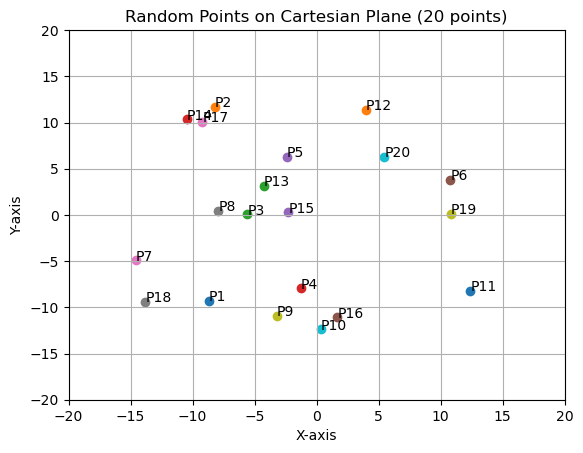

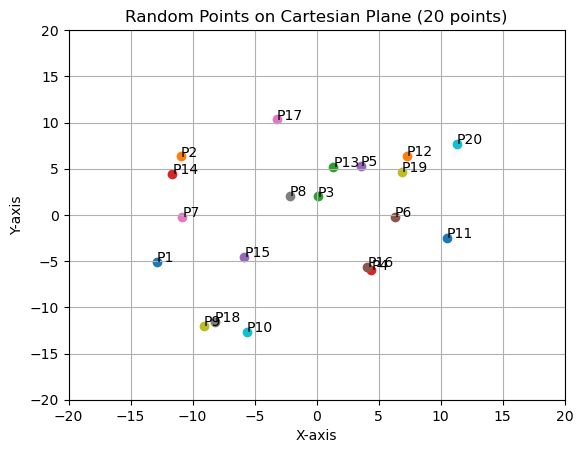

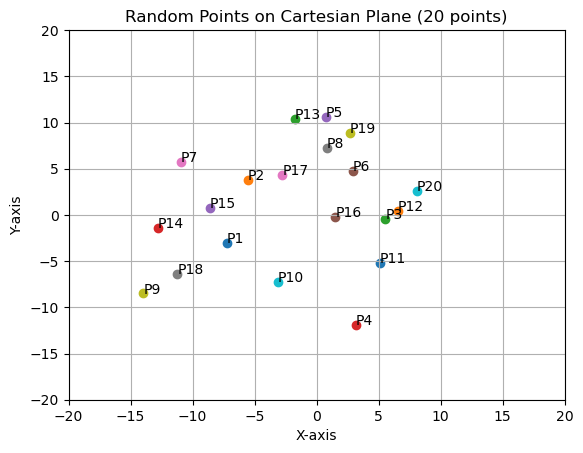

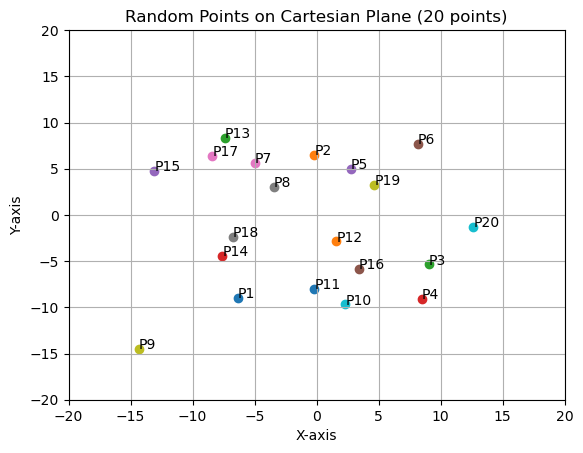

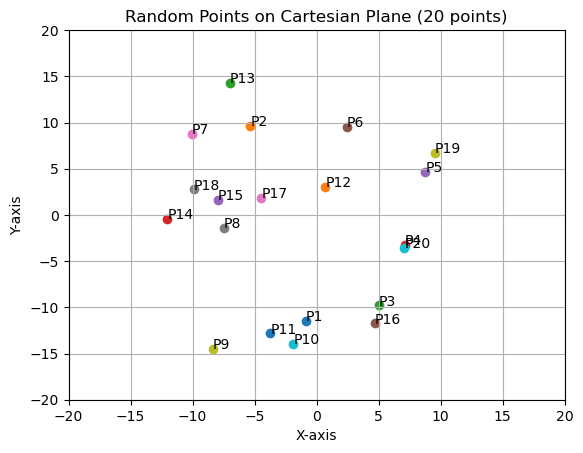

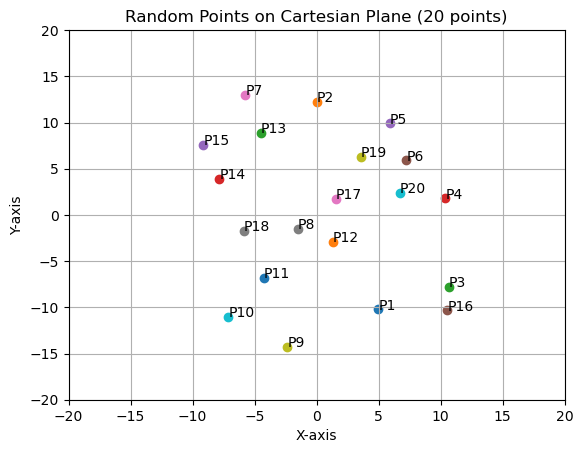

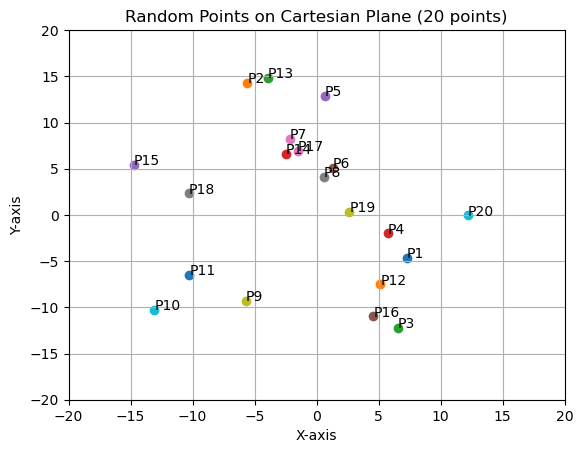

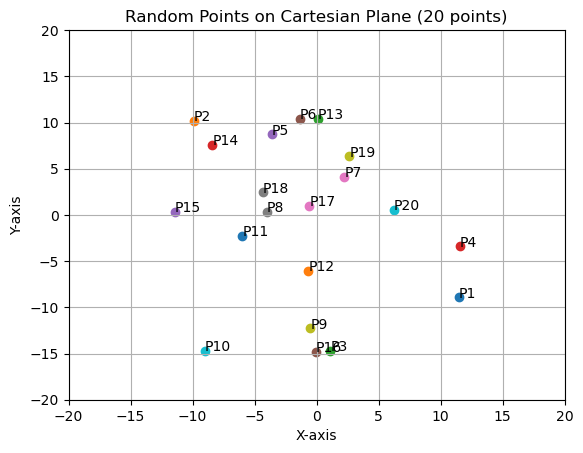

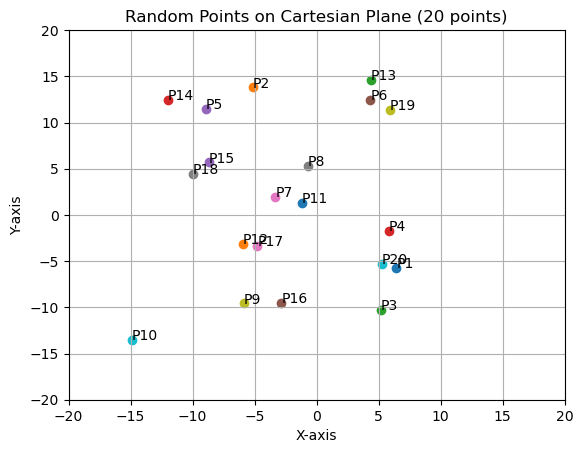

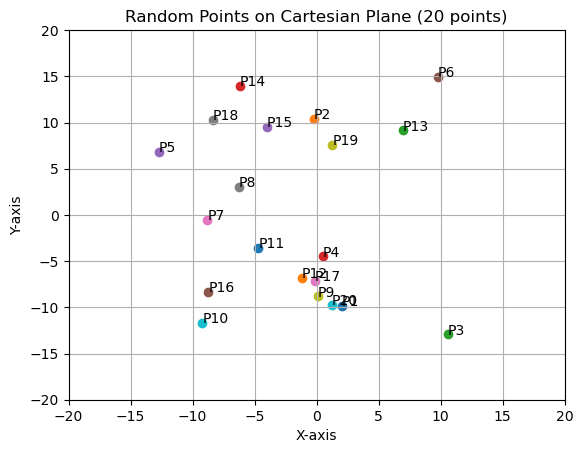

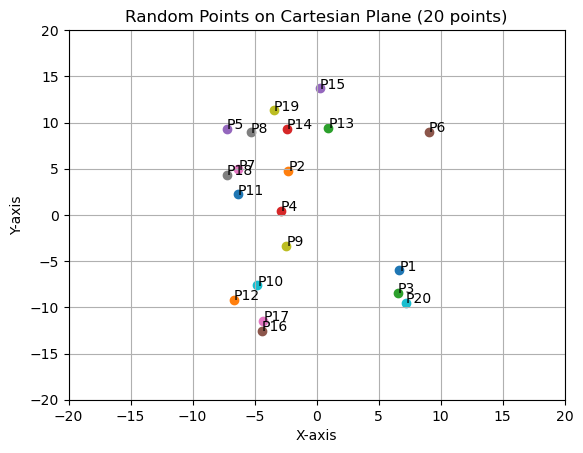

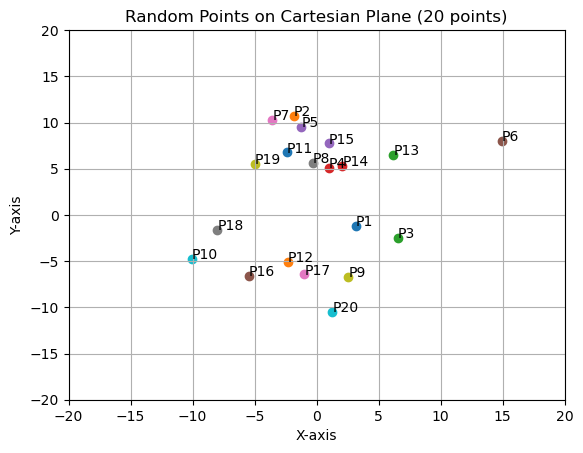

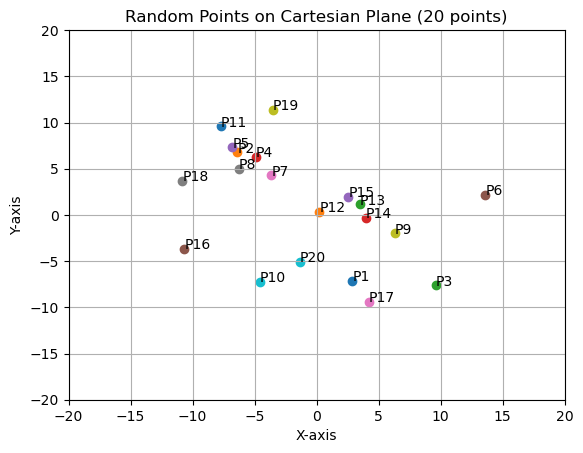

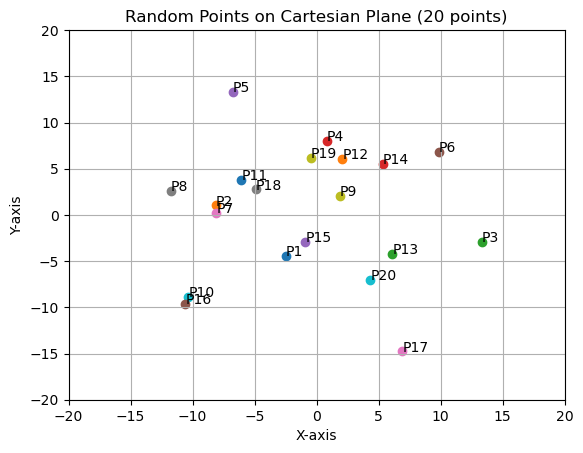

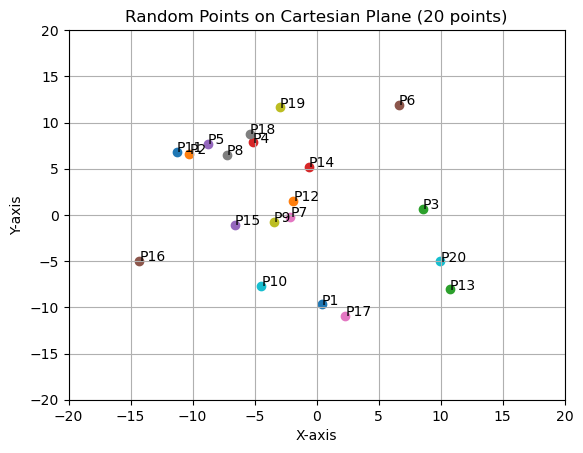

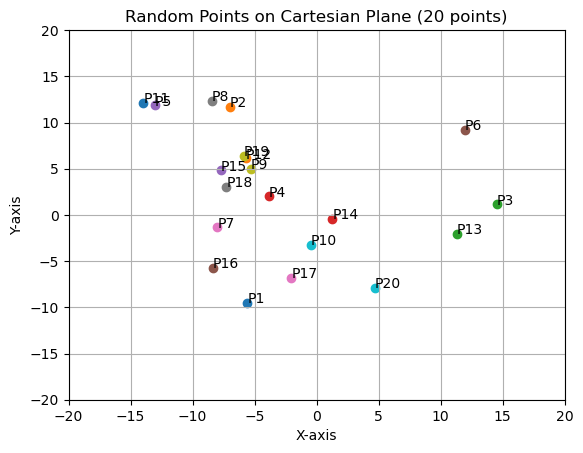

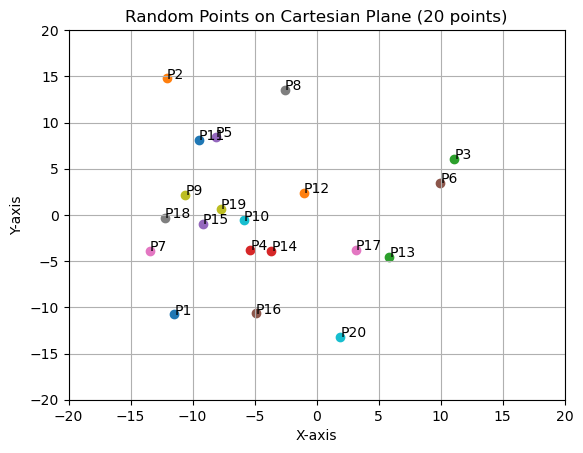

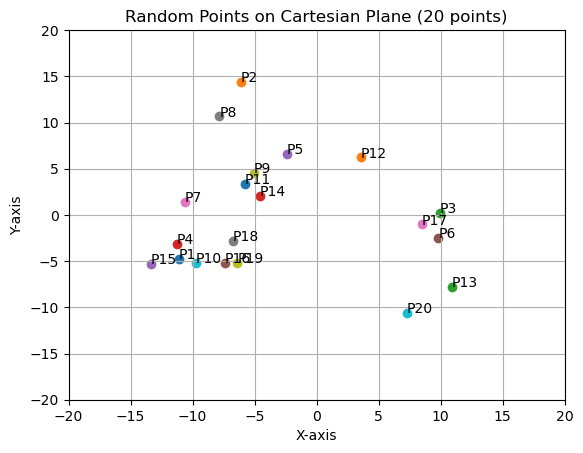

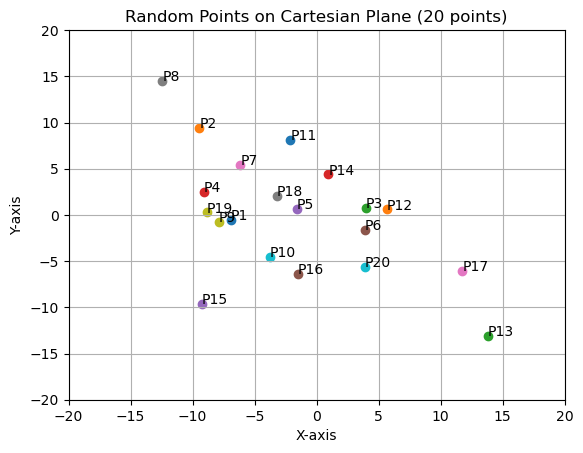

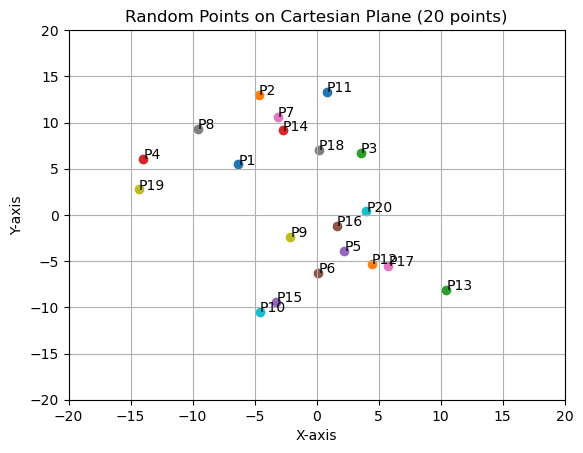

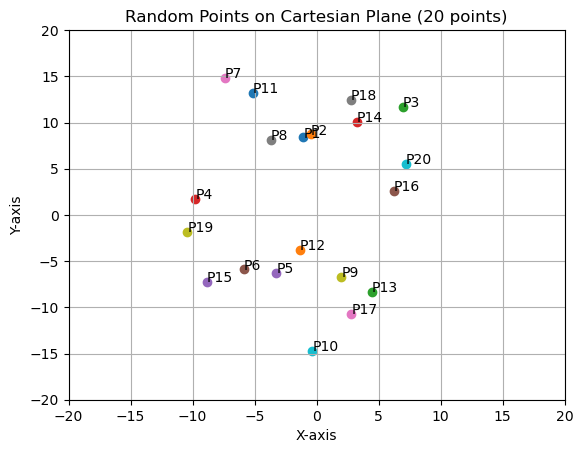

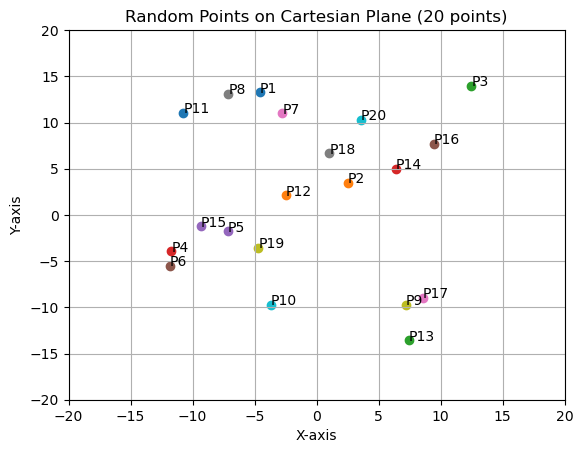

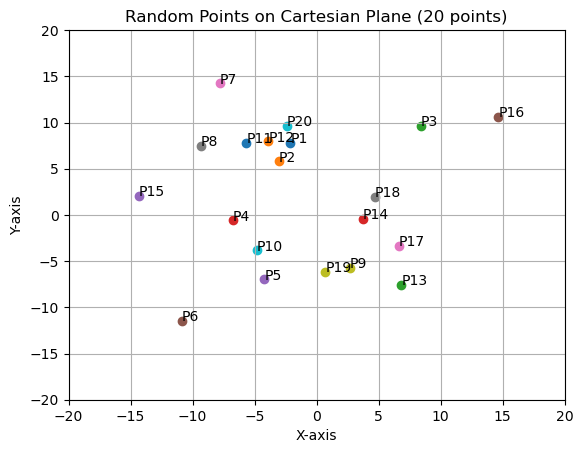

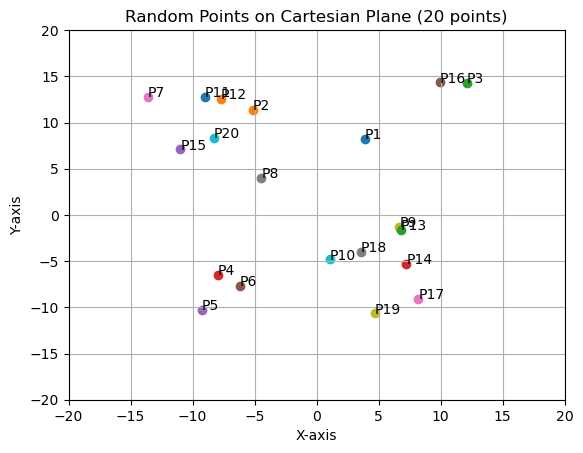

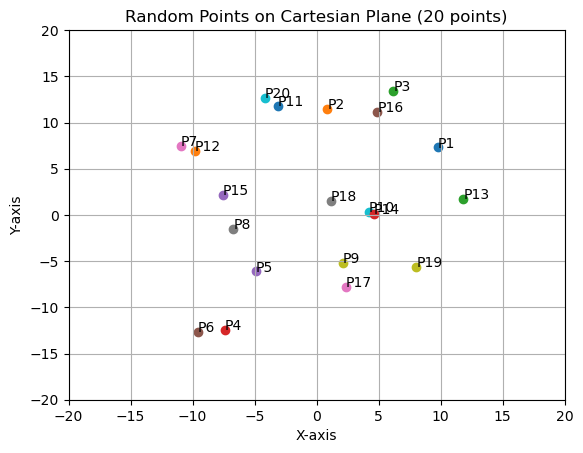

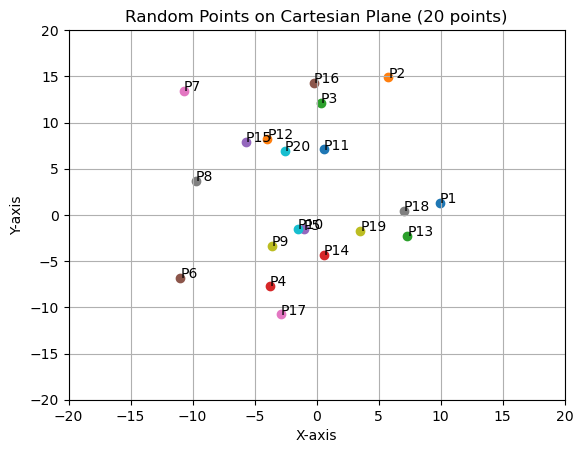

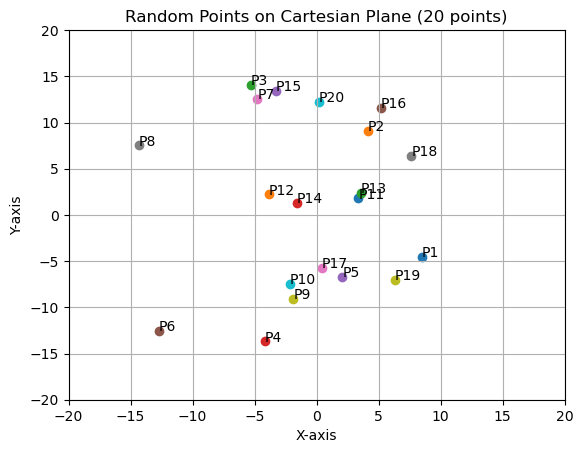

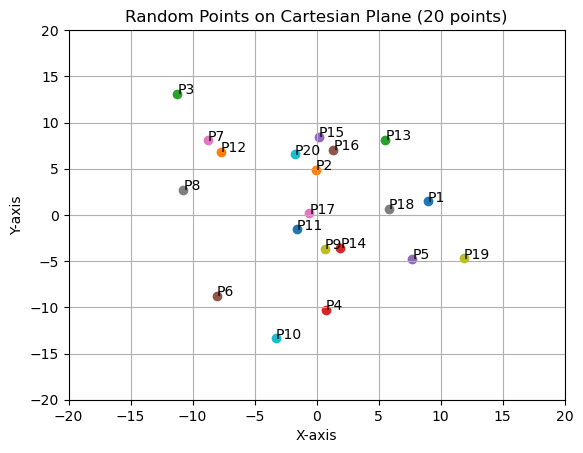

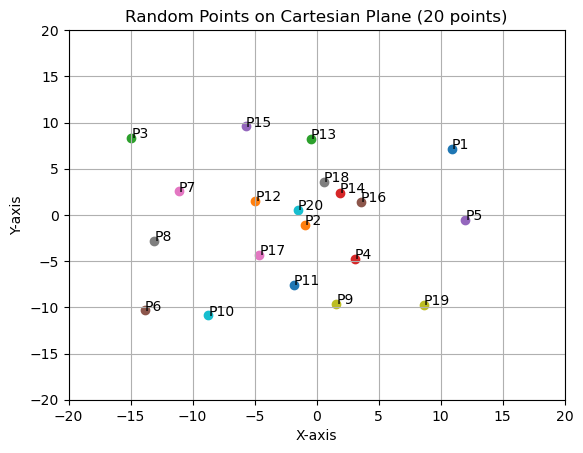

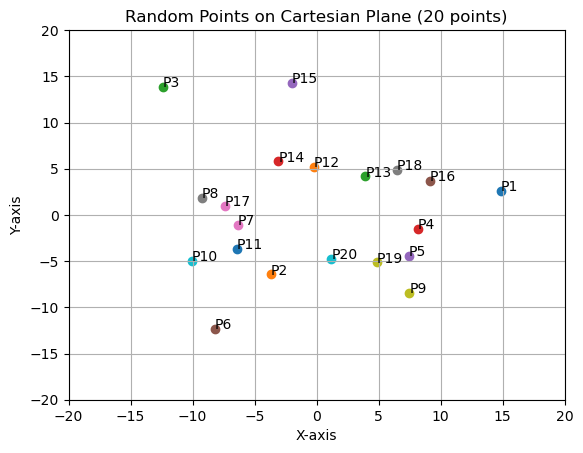

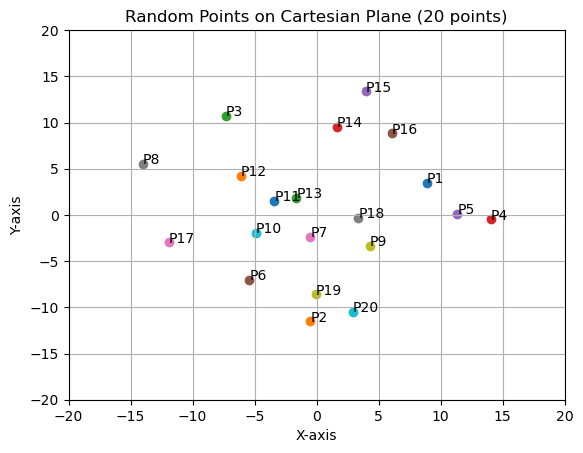

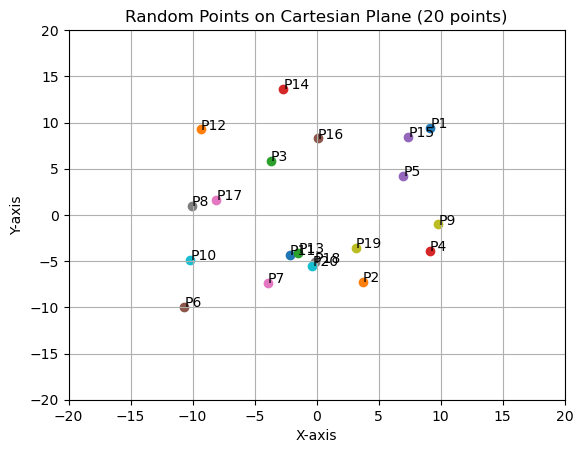

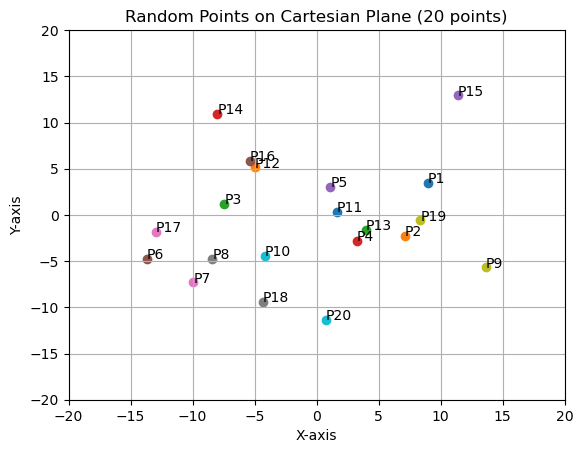

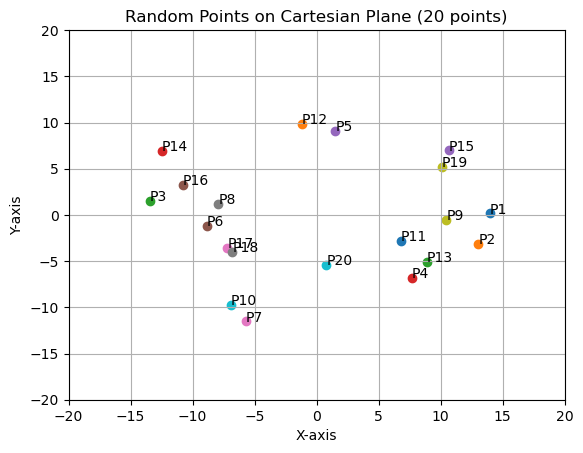

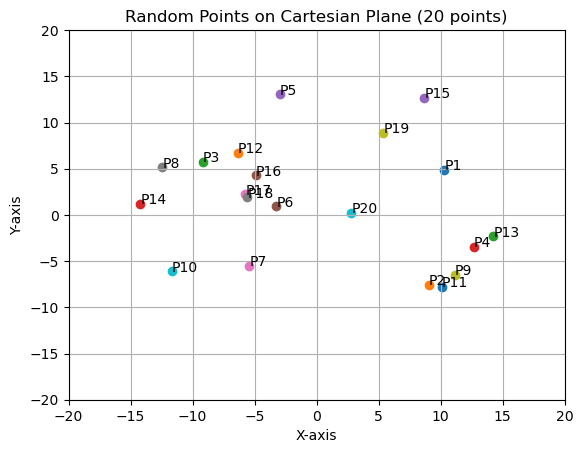

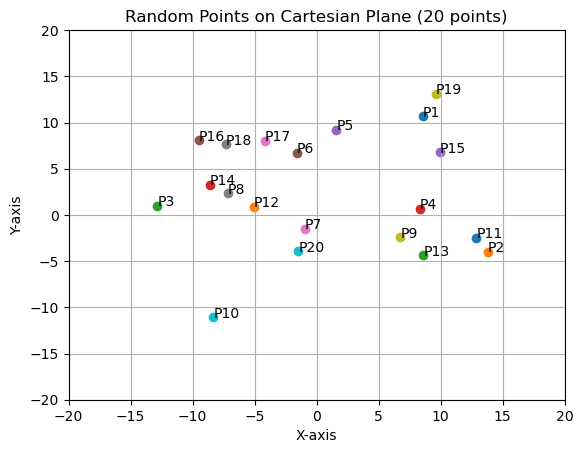

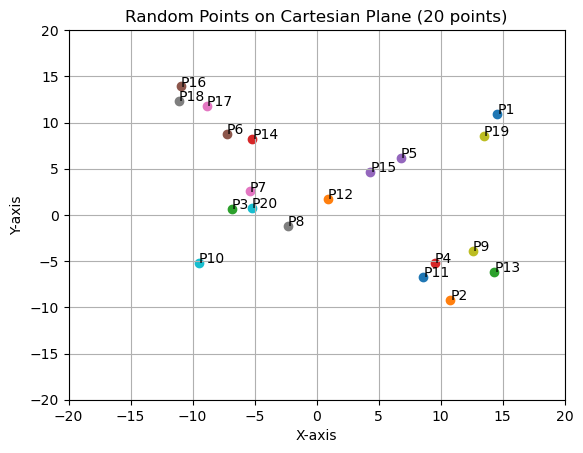

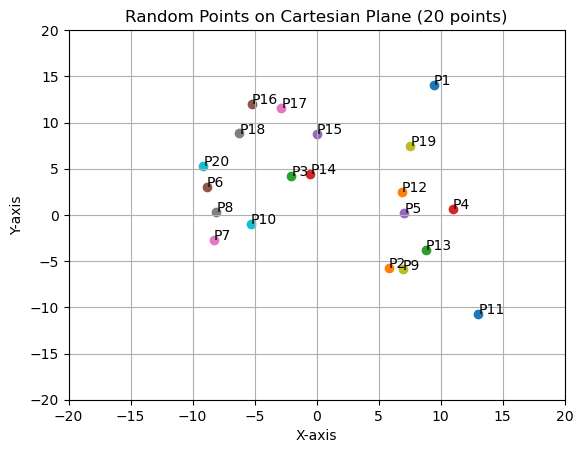

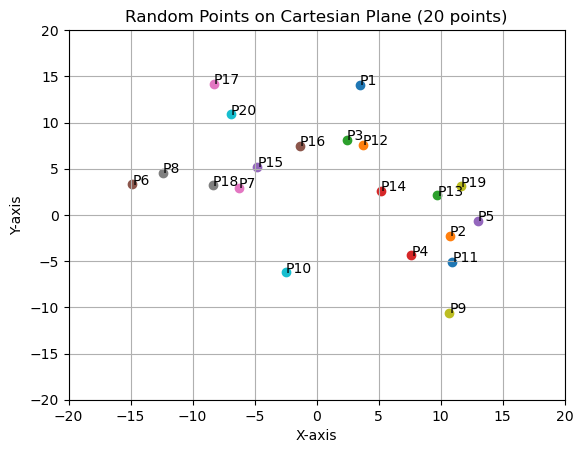

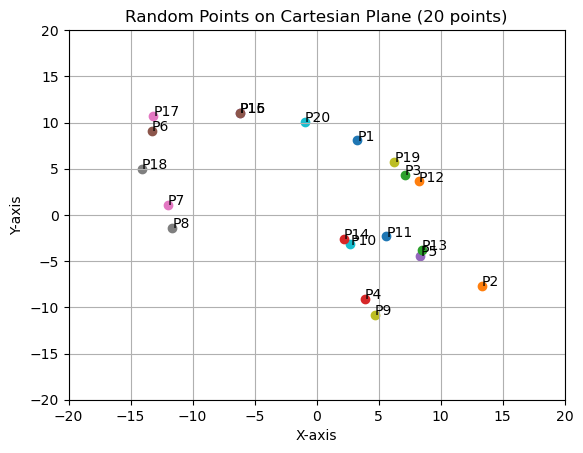

In [21]:
generate_configurations(40, 100)
os.system(f"afplay {notification_sound}")

In [22]:
Xtest,ytest = generate_data(50)
#os.system(f"afplay {notification_sound}")
savedata(Xtest, f"InstanceTest.xlsx")
savedata(ytest, f"SolutionTest.xlsx")

In [23]:
generate_predictions(40)
apply_algo(40)   

Train Accuracy: 0.39
Test Accuracy: 0.0
prediction generated 0
Train Accuracy: 0.6
Test Accuracy: 0.0
prediction generated 1
Train Accuracy: 0.33
Test Accuracy: 0.0
prediction generated 2
Train Accuracy: 0.11
Test Accuracy: 0.0
prediction generated 3
Train Accuracy: 0.29
Test Accuracy: 0.0
prediction generated 4
Train Accuracy: 0.33
Test Accuracy: 0.0
prediction generated 5
Train Accuracy: 0.45
Test Accuracy: 0.0
prediction generated 6
Train Accuracy: 0.34
Test Accuracy: 0.0
prediction generated 7
Train Accuracy: 0.22
Test Accuracy: 0.0
prediction generated 8
Train Accuracy: 0.41
Test Accuracy: 0.06
prediction generated 9
Train Accuracy: 0.44
Test Accuracy: 0.0
prediction generated 10
Train Accuracy: 0.46
Test Accuracy: 0.0
prediction generated 11
Train Accuracy: 0.41
Test Accuracy: 0.0
prediction generated 12
Train Accuracy: 0.29
Test Accuracy: 0.0
prediction generated 13
Train Accuracy: 0.53
Test Accuracy: 0.0
prediction generated 14
Train Accuracy: 0.58
Test Accuracy: 0.0
prediction

In [24]:
print(accuracy_function(Sol1, ytest))
print(accuracy_function(Sol4, ytest))
print(accuracy_function(Sol8, ytest))
print(accuracy_function(Sol12, ytest))
print(accuracy_function(Sol16, ytest))
print(accuracy_function(Sol20, ytest))
print(accuracy_function(Sol25, ytest))
print(accuracy_function(Sol30, ytest))
print(accuracy_function(Sol36, ytest))
print(accuracy_function(Sol40, ytest))


print(accuracy_function2(Sol1, ytest))
print(accuracy_function2(Sol4, ytest))
print(accuracy_function2(Sol8, ytest))
print(accuracy_function2(Sol12, ytest))
print(accuracy_function2(Sol16, ytest))
print(accuracy_function2(Sol20, ytest))
print(accuracy_function2(Sol25, ytest))
print(accuracy_function2(Sol30, ytest))
print(accuracy_function2(Sol36, ytest))
print(accuracy_function2(Sol40, ytest))

0.721
0.739
0.751
0.726
0.702
0.703
0.748
0.764
0.758
0.959
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.68


In [ ]:
 X0

In [ ]:
Sol31

In [ ]:
y31

In [ ]:
summ = 16/20 + 15/20 + 16/20 + 16/20 + 16/20 + 17/20 + 16/20 + 17/20 + 15/20 + 15/20

In [ ]:
summ/10

In [ ]:
_ / 10

In [25]:
# # checking if value is greater than threshold 0.5
# y_pred_3_1 = np.where(y_pred_3_1 > 0.5, 1, 0)
# y_pred_3_2 = np.where(y_pred_3_2 > 0.5, 1, 0)
# y_pred_3_3 = np.where(y_pred_3_3 > 0.5, 1, 0)
# y_pred_3_4 = np.where(y_pred_3_4 > 0.5, 1, 0)
# y_pred_3_5 = np.where(y_pred_3_5 > 0.5, 1, 0)
# y_pred_3_6 = np.where(y_pred_3_6 > 0.5, 1, 0)
# y_pred_3_7 = np.where(y_pred_3_7 > 0.5, 1, 0)
# y_pred_3_8 = np.where(y_pred_3_8 > 0.5, 1, 0)
# y_pred_3_9 = np.where(y_pred_3_9 > 0.5, 1, 0)

# checking if value is greater than threshold 0.5
sol_alpha1 = np.where(sol_alpha1 > 0.5, 1, 0)
sol_alpha2 = np.where(sol_alpha2 > 0.5, 1, 0)
sol_alpha3 = np.where(sol_alpha3 > 0.5, 1, 0)
sol_alpha4 = np.where(sol_alpha4 > 0.5, 1, 0)
sol_alpha5 = np.where(sol_alpha5 > 0.5, 1, 0)
sol_alpha6 = np.where(sol_alpha6 > 0.5, 1, 0)
sol_alpha7 = np.where(sol_alpha7 > 0.5, 1, 0)
sol_alpha8 = np.where(sol_alpha8 > 0.5, 1, 0)
sol_alpha9 = np.where(sol_alpha9 > 0.5, 1, 0)

In [26]:
accuracy_vec = []
accuracy_vec.append( accuracy_function(sol_alpha1, ytest))
accuracy_vec.append( accuracy_function(sol_alpha2, ytest))
accuracy_vec.append( accuracy_function(sol_alpha3, ytest))
accuracy_vec.append( accuracy_function(sol_alpha4, ytest))
accuracy_vec.append( accuracy_function(sol_alpha5, ytest))
accuracy_vec.append( accuracy_function(sol_alpha6, ytest))
accuracy_vec.append( accuracy_function(sol_alpha7, ytest))
accuracy_vec.append( accuracy_function(sol_alpha8, ytest))
accuracy_vec.append( accuracy_function(sol_alpha9, ytest))
accuracy_vec

# accuracy_vec = []
# accuracy_vec.append( accuracy_function2(sol_alpha1, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha2, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha3, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha4, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha5, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha6, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha7, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha8, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha9, ytest))
# accuracy_vec

[0.959, 0.959, 0.959, 0.959, 0.959, 0.943, 0.93, 0.891, 0.867]

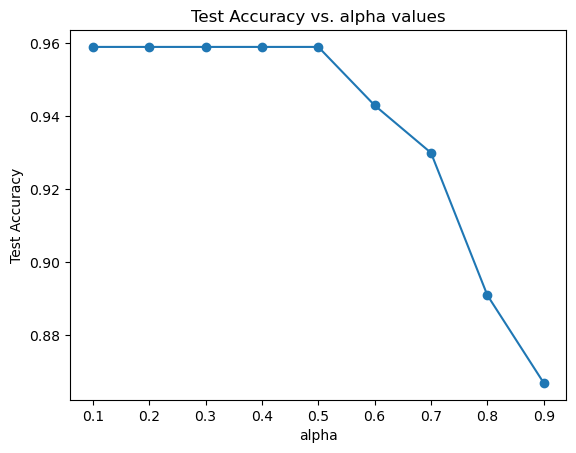

In [27]:
import matplotlib.pyplot as plt

alpha_vec = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,  0.9]

plt.plot(alpha_vec, accuracy_vec, marker='o')

# Adding labels and title
plt.xlabel('alpha')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. alpha values')
plt.savefig("plot.jpg")
# Display the plot
plt.show()

In [38]:
# import pandas as pd

# opt_solution = pd.read_excel('/Users/rob/Desktop/Semester data/Sem 4 S23/CS6340 Prof Haas/Volunteer Project/Incremental Learning/experiments/1data/Experiment for 1/testing sets/SolutionTest.xlsx')


# pred = pd.read_excel('/Users/rob/Desktop/Semester data/Sem 4 S23/CS6340 Prof Haas/Volunteer Project/Incremental Learning/experiments/1data/Experiment for 1/classifier predictions/Prediction0.xlsx')


# elementwise_comparison = (pred == opt_solution)


# equal_counts = np.sum(elementwise_comparison, axis=1)

# equal_counts

# df = pd.concat([opt_solution, equal_counts], axis=1)

# df.to_excel("counts.xlsx", index=False)